<a href="https://colab.research.google.com/github/hrandrIAga/ML_for_networks/blob/main/RL_noNAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construction du modèle en cas d'absence de NAN**

Valable pour les trains n'étant pas Premiers, deuxièmes ou troisièmes au départ de la gare S : 
> C'est à dire :
> * p1q0 != Nan $\bigcap$ p2q0 != Nan $\bigcap$ p3q0 != Nan


Valable pour les gares n'étant pas les Premères, deuxièmesou troisièmes du trajet du train k :
> C'est à dire :
> * p0q1 != Nan $\bigcap$ p0q2 != Nan $\bigcap$ p0q3 != Nan

### **Import data and libraries**

In [1]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py

#libraries
import feature_engineering
import visualization
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import sklearn
import missingno as msno
from pandas.plotting import scatter_matrix

--2023-05-14 09:48:48--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-05-14 09:48:48 (31.4 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

--2023-05-14 09:48:48--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443.

In [2]:
#dataset
!pip install GitPython
!git clone https://github.com/hrandrIAga/ML_for_networks.git
df = pd.read_csv('/content/ML_for_networks/Code/Dataset/Xtrain.csv')
Y = pd.read_csv('/content/ML_for_networks/Code/Dataset/Ytrain.csv', usecols = [1])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
Cloning into 'ML_for_networks'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 0), reused 20 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), 674.32 KiB | 1.08 MiB/s, done.


In [3]:
print(df.shape)
print(Y.shape)

(31119, 12)
(31119, 1)


Fusion X and Y

In [4]:
p0q0 = Y
df['p0q0'] = p0q0

In [5]:
df.shape

(31119, 13)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31119 entries, 0 to 31118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31119 non-null  object 
 1   train        31119 non-null  int64  
 2   way          31119 non-null  int64  
 3   station      31119 non-null  object 
 4   hour         27915 non-null  object 
 5   composition  31119 non-null  int64  
 6   p1q0         29067 non-null  float64
 7   p2q0         26974 non-null  float64
 8   p3q0         24935 non-null  float64
 9   p0q1         27917 non-null  float64
 10  p0q2         24720 non-null  float64
 11  p0q3         21527 non-null  float64
 12  p0q0         31119 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
df.head(10)

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225
5,2019-01-15,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.218,0.154,0.106,0.238
6,2019-01-17,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.209,0.140,0.094,0.228
7,2019-01-18,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.207,0.141,0.104,0.217
8,2019-01-21,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.234,0.149,0.111,0.258
9,2019-01-22,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.223,0.151,0.102,0.242


### **I. Data Pre-processing**
##### *A. Drop lines with NAN*

In [8]:
# Suppression des lignes contenant des NaN
df = df.dropna()

In [9]:
df.head(5)

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
116,2019-01-07,1,0,AJ,06:00:00,2,0.149,0.183,0.168000,0.216,0.275,0.230,0.282
117,2019-01-08,1,0,AJ,06:00:00,2,0.160,0.216,0.190000,0.216,0.268,0.247,0.271
118,2019-01-10,1,0,AJ,06:00:00,2,0.177,0.180,0.175000,0.227,0.268,0.250,0.270
119,2019-01-11,1,0,AJ,06:00:00,2,0.092,0.131,0.171667,0.229,0.281,0.253,0.285
120,2019-01-14,1,0,AJ,06:00:00,2,0.161,0.134,0.182667,0.225,0.302,0.258,0.315


##### *B. Convert Data*
###### 1. date


In [10]:
#Check the possible values that a certain feature can take
print ("Values of date: ",  df['date'].unique() )

Values of date:  ['2019-01-07' '2019-01-08' '2019-01-10' '2019-01-11' '2019-01-14'
 '2019-01-15' '2019-01-17' '2019-01-18' '2019-01-21' '2019-01-22'
 '2019-01-23' '2019-01-24' '2019-01-28' '2019-01-29' '2019-01-31'
 '2019-02-01' '2019-02-04' '2019-02-05' '2019-02-06' '2019-02-07'
 '2019-02-11' '2019-02-12' '2019-02-13' '2019-02-14' '2019-02-15'
 '2019-02-18' '2019-02-19' '2019-02-21' '2019-03-11' '2019-03-12'
 '2019-03-14' '2019-03-18' '2019-03-20' '2019-03-22' '2019-03-25'
 '2019-03-26' '2019-03-27' '2019-03-28' '2019-03-29' '2019-04-01'
 '2019-04-02' '2019-04-04' '2019-04-05' '2019-04-08' '2019-04-09'
 '2019-04-10' '2019-04-11' '2019-04-12' '2019-04-15' '2019-04-18'
 '2019-04-19' '2019-05-06' '2019-05-07' '2019-05-10' '2019-05-14'
 '2019-05-15' '2019-05-16' '2019-05-20' '2019-01-09' '2019-01-16'
 '2019-01-25' '2019-02-08' '2019-03-15' '2019-05-09' '2019-05-13'
 '2019-02-20' '2019-02-22' '2019-03-13' '2019-04-03' '2019-03-21'
 '2019-03-19' '2019-01-30' '2019-04-17' '2019-04-16']


Les données de date ne sont pas exploitables. Il faut les grouper pour en tirer quelque chose. 
Nos connaissances pratiques du réseau transilien motivent la conversion suivante :  
On considère que les dates en format YY/MM/DD n'apportent pas beaucoup d'information et risquent de fausser le modèle
> On ajoute une colonne 'day' : le jour de la semaine correspondant à la date

In [11]:
# Convertir la colonne 'date' en format de date
df['date'] = pd.to_datetime(df['date'])

# Extraire le jour de la semaine et l'ajouter comme colonne 'day'
df['day'] = df['date'].dt.day_name()

<ipython-input-11-d8d85f230678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-11-d8d85f230678>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['date'].dt.day_name()


On cherche à déterminer l'occurence des jours de la semaine dans le dataset

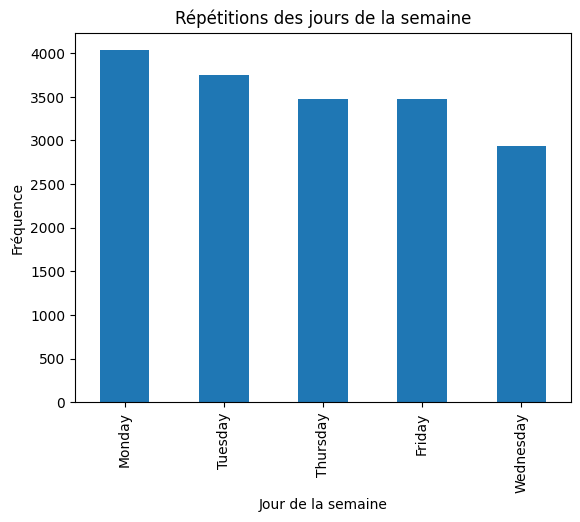

In [12]:
# Comptage des occurrences des jours de la semaine
counts = df['day'].value_counts()

# Tracé de l'histogramme
counts.plot(kind='bar')

# Configuration de l'affichage du graphique
plt.title('Répétitions des jours de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

 On convertit les jours de la semaine en vecteurs
> permet de catégoriser en éliminant les biais (d'une catégorisation en entier)  

> permet de catégoriser en préservant la distance ('une catégorisation en entier)

In [13]:
# Appliquer le One-Hot Encoding sur la colonne 'Day'
one_hot_encoded = pd.get_dummies(df['day'])

one_hot_encoded = one_hot_encoded.add_prefix('Day_')

# Ajouter les colonnes encodées au DataFrame d'origine
df = pd.concat([df, one_hot_encoded], axis=1)

###### 2. train

In [14]:
#Check the possible values that a certain feature can take
print ("Values of train: ",  df['train'].unique() )

Values of train:  [ 1 10 11 13 14 15 16 17 18 19  2 20 21 23 24 25 26 27 28 29  3 30 31 32
 33 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52 53 54 55
  6  7  8  9]


 On remarque que les valeurs possibles sont discrètes
 Il n'y a pas de relation d'ordre entre les trains, les numéros ne sont là que pour les identifier  
 C'est pourquoi, on convertit les numéros de train en vecteurs :
> permet de catégoriser en éliminant les biais (d'une catégorisation en entier)  

> permet de catégoriser en préservant la distance ('une catégorisation en entier)

In [15]:
# Appliquer le One-Hot Encoding sur la colonne 'train'
one_hot_encoded = pd.get_dummies(df['train'])

# Renommer les colonnes générées avec un préfixe 'Train_'
one_hot_encoded = one_hot_encoded.add_prefix('Train_')

# Ajouter les colonnes encodées au DataFrame d'origine
df = pd.concat([df, one_hot_encoded], axis=1)

On cherche à afficher la fréquence d'apparition des numéros de train dans le dataset

array([[<Axes: title={'center': 'train'}>]], dtype=object)

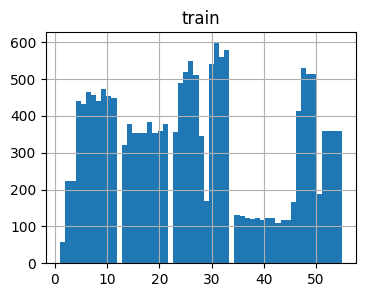

In [16]:
df[['train']].hist(bins = 55, figsize=(4,3))

On remarque que 3 numéros de trains sont manquants. 
> Ce sont probablement des trains passant dans 3 gares ou moins  
> Ou des trains passant toujours en 1er 2e ou  3e dans les gares de leurs trajets

On en conclue également que supprimer les lignes avec des NAN est insuffisant, sinon 3 lignes de trains ne seront jamais traitées. Il faudra réfléchir à un autre moyen de gérer les NAN

###### 3. Way

In [17]:
#Check the possible values that a certain feature can take
print ("Values of way: ",  df['way'].unique() )

Values of way:  [0]



Il n'y a que la valeur 0 , cette variable n'est pas utile donc on peut supprimer cette colonne

In [18]:
df = df.drop('way', axis  =1)

###### 4. Station

In [19]:
#Check the possible values that a certain feature can take
print ("Values of station: ",  df['station'].unique() )

Values of station:  ['AJ' 'AD' 'AI' 'AK' 'AM' 'AT' 'AW' 'BB' 'AQ' 'AE' 'AL' 'AO' 'BC' 'AB'
 'BF' 'BH' 'AZ' 'AC' 'AG' 'AH' 'AU' 'AA' 'BJ']


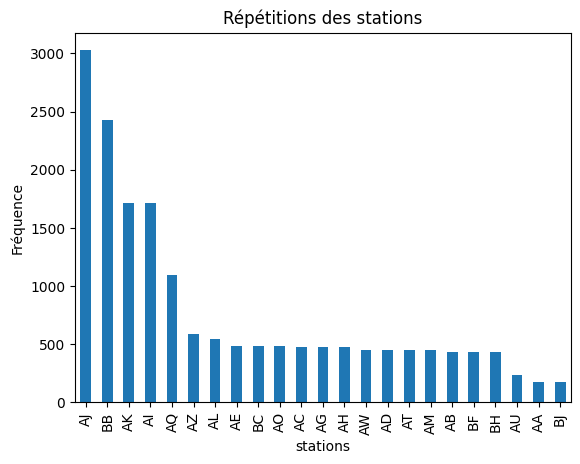

In [20]:
# Comptage des occurrences des stations 
counts = df['station'].value_counts()

# Tracé de l'histogramme
counts.plot(kind='bar')

# Configuration de l'affichage du graphique
plt.title('Répétitions des stations')
plt.xlabel('stations')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

On remarque que13 identifiants de station sont manquants. 

On en conclue également que supprimer les lignes avec des NAN est insuffisant, sinon l'entrainement du modèle ne comprendra pas 13 stations sur 36. Il faudra réfléchir à un autre moyen de gérer les NAN

 On remarque que les valeurs possibles sont discrètes
 Il n'y a pas de relation l'identifiant des stations.  
 C'est pourquoi, on convertit l'identifiant des trains en vecteurs :
> permet de catégoriser en éliminant les biais (d'une catégorisation en entier)  

> permet de catégoriser en préservant la distance ('une catégorisation en entier)

In [21]:
# Appliquer le One-Hot Encoding sur la colonne 'station'
one_hot_encoded = pd.get_dummies(df['station'])
# Renommer les colonnes générées avec un préfixe 'Station_'

one_hot_encoded = one_hot_encoded.add_prefix('Station_')

# Ajouter les colonnes encodées au DataFrame d'origine
df = pd.concat([df, one_hot_encoded], axis=1)

###### 5. hour

In [22]:
#Check the possible values that a certain feature can take
print ("Values of hour: ",  df['hour'].unique() )

Values of hour:  ['06:00:00' '07:00:00' '08:00:00' '09:00:00' '11:00:00']


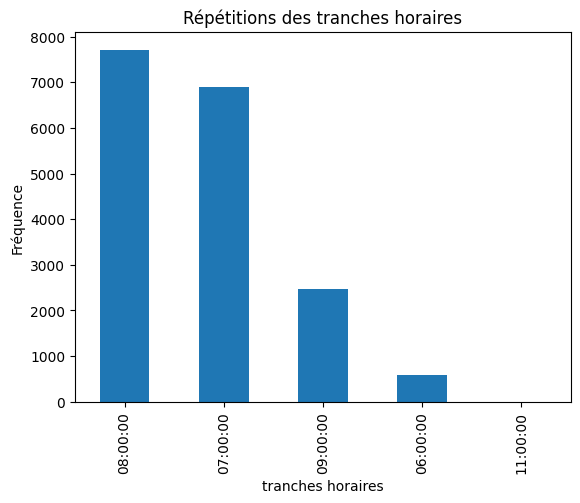

In [23]:
# Comptage des occurrences des tranches horaires
counts = df['hour'].value_counts()

# Tracé de l'histogramme
counts.plot(kind='bar')

# Configuration de l'affichage du graphique
plt.title('Répétitions des tranches horaires')
plt.xlabel('tranches horaires')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

On convertit ces valeurs en entier, afin de conserver la distance et l'ordination

In [24]:
hour_int = df['hour']
hour_int = hour_int.str[:2].astype(int)
print ("Values of hour_int: ",  hour_int.unique() )

Values of hour_int:  [ 6  7  8  9 11]


In [25]:
# on ajoute cette colonne au df
df['hour_int'] = hour_int

###### 6. composition

In [26]:
#Check the possible values that a certain feature can take
print ("Values of composition: ",  df['composition'].unique() )

Values of composition:  [2 1]


> on ne change rien  
> conserver les valeurs entières (plutôt que le one hot encoder) permet de garder la relation/distance et ordinale entre "1 rame" et "2 rames"

array([[<Axes: title={'center': 'composition'}>]], dtype=object)

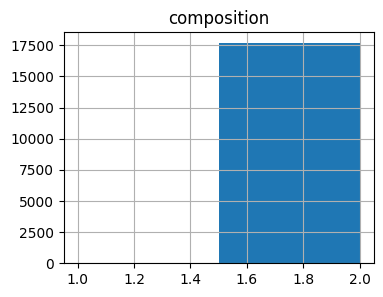

In [27]:
df[['composition']].hist(bins =2, figsize=(4,3))

###### 7. PiQ0

* p1q0 ∈ [0,1] est le taux d’occupation du précédent train k-1 à la même gare s
* p2q0 ∈ [0,1] est le taux d’occupation du second train précédent k-2 à la même gare s
* p3q0 ∈ [0,1] est le taux d’occupation du troisième train précédent k-3 à la même gare s

<Axes: >

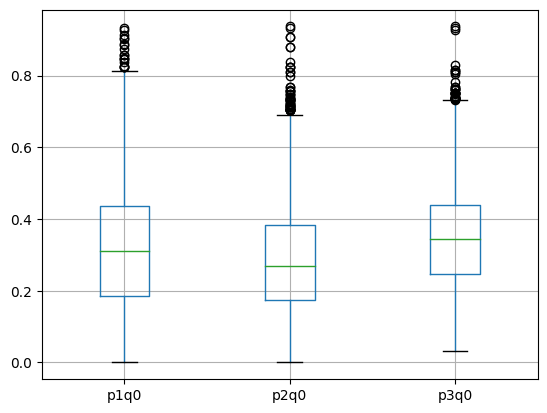

In [28]:
df.boxplot(column=['p1q0', 'p2q0','p3q0'])

Text(0.5, 1.0, 'p3q0')

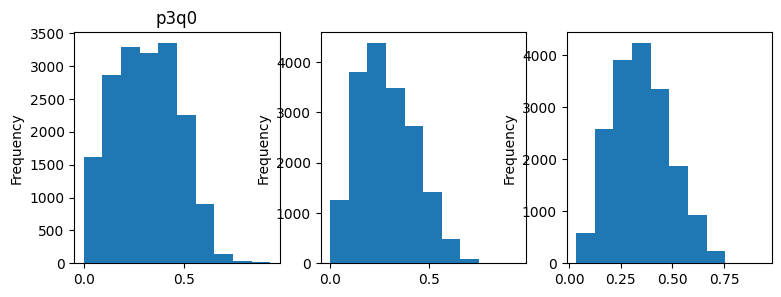

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

df['p1q0'].plot(kind='hist', ax=axes[0])
axes[0].set_title('p1q0')

df['p2q0'].plot(kind='hist', ax=axes[1])
axes[0].set_title('p2q0')

df['p3q0'].plot(kind='hist', ax=axes[2])
axes[0].set_title('p3q0')

On constate une répartition assez similaire à une loi normale
> intéressant pour une regression linéaire

On cherche maintenant à déterminer la corrélation entre ces variables explicatives et p0q0

In [30]:
piq0 = df[['p1q0','p2q0', 'p3q0', 'p0q0']]
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                piq0, target_feature='p0q0')

features_corr[:]

p0q0    1.00
p3q0    0.60
p2q0    0.49
p1q0    0.46
Name: p0q0, dtype: float64

> Logiquement, il y a une correlation assez importante entre piq0 et p0q0 
 
> Contre intuitivement : le taux d'occupation du dernier train apssez dans la gare, a moins d'importance que le penulitème train passez et antepenultieme

In [31]:
piq0.describe()

,p1q0,p2q0,p3q0,p0q0
count,17666.000000,17666.000000,17666.000000,17666.000000
mean,0.314845,0.285058,0.350139,0.337881
std,0.158782,0.140633,0.138505,0.141410
min,0.000000,0.000000,0.033000,0.000000
25%,0.184000,0.174000,0.246000,0.230000
50%,0.311000,0.269000,0.344000,0.330500
75%,0.436000,0.382000,0.440000,0.432000
max,0.934000,0.937000,0.937000,0.974000


###### 8. p0qj

* p0q1 ∈ [0,1] est le taux d’occupation du même train k à la gare précédente s-1
* p0q2 ∈ [0,1] est le taux d’occupation du même train k à la seconde gare précédente s-2
* p0q3 ∈ [0,1] est le taux d’occupation du même train k à la troisième gare précédente s-2

<Axes: >

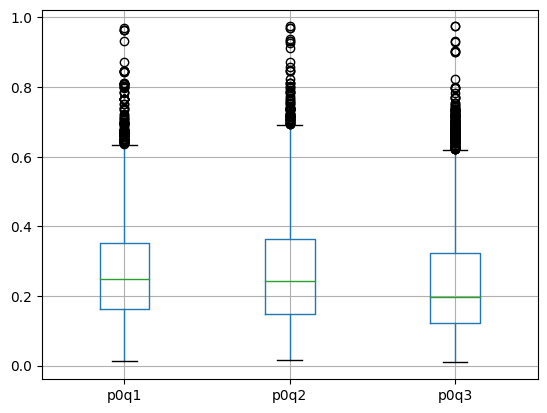

In [32]:
df.boxplot(column=['p0q1', 'p0q2','p0q3'])

Text(0.5, 1.0, 'p0q3')

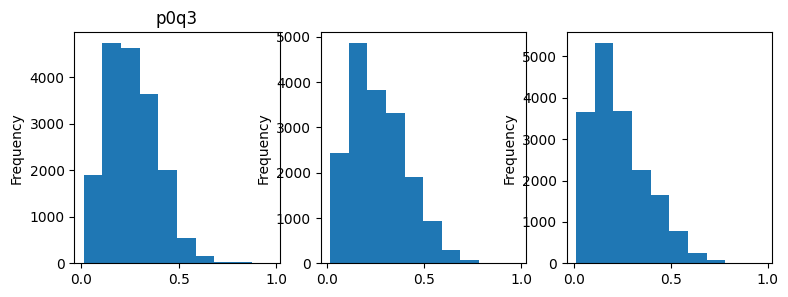

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

df['p0q1'].plot(kind='hist', ax=axes[0])
axes[0].set_title('p0q1')

df['p0q2'].plot(kind='hist', ax=axes[1])
axes[0].set_title('p0q2')

df['p0q3'].plot(kind='hist', ax=axes[2])
axes[0].set_title('p0q3')

On constate une répartition assez similaire à une loi normale
> intéressant pour une regression linéaire

In [34]:
p0qj = df[['p0q1','p0q2', 'p0q3', 'p0q0']]
p0qj.describe()

,p0q1,p0q2,p0q3,p0q0
count,17666.000000,17666.000000,17666.000000,17666.000000
mean,0.262560,0.265433,0.230700,0.337881
std,0.128577,0.145036,0.147213,0.141410
min,0.014000,0.017000,0.009000,0.000000
25%,0.163000,0.147000,0.123000,0.230000
50%,0.250000,0.243000,0.198000,0.330500
75%,0.352000,0.365000,0.322000,0.432000
max,0.969000,0.974000,0.974000,0.974000


On cherche maintenant à déterminer la corrélation entre certaines variables explicatives et p0q0

In [35]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                p0qj, target_feature='p0q0')

features_corr[:]

p0q0    1.00
p0q2    0.90
p0q1    0.88
p0q3    0.80
Name: p0q0, dtype: float64

Logique : 
* p0q3 moins impactant que p0q1 et p0q2
* p0qj plus impactant que piq0

Etonnant : 
* p0q2 plus impactant que p0q1
> Ceci dit, la différence n'est pas significative

###### 10. Etude de la corrélation entre les variables explicatives

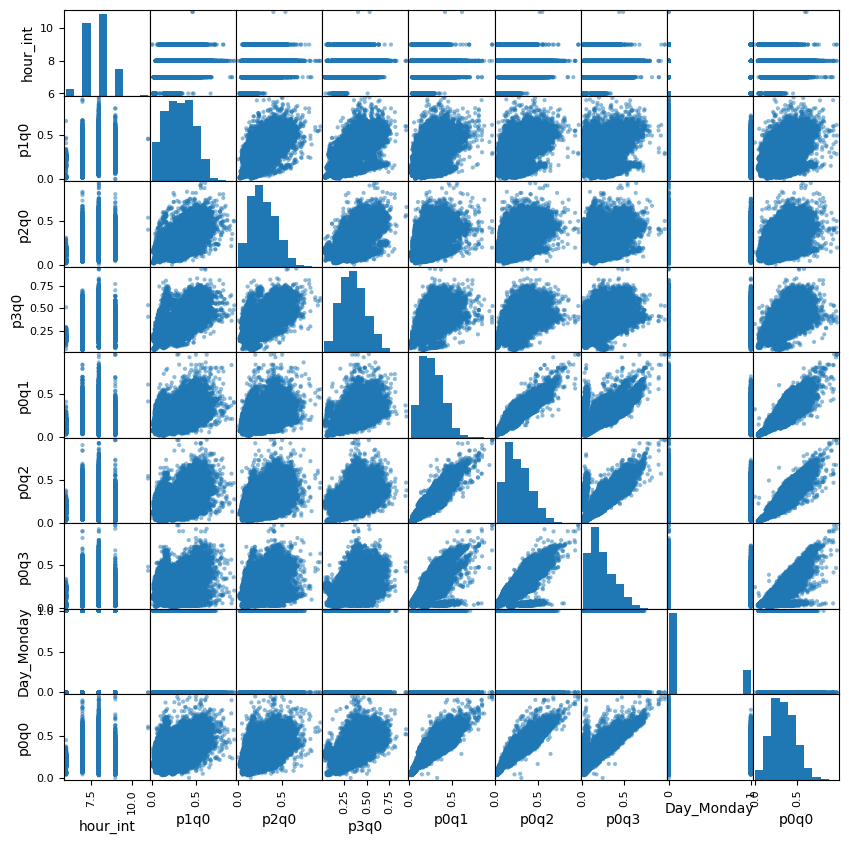

In [36]:
# Let us just consider some features
columns_to_plot = ['hour_int',
                       'p1q0', 'p2q0',
                        'p3q0', 
                        'p0q1', 'p0q2',
                       'p0q3', 'Day_Monday', 'p0q0']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

In [37]:
corrmatrix = df[columns_to_plot].corr()
corrmatrix

,hour_int,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Day_Monday,p0q0
hour_int,1.000000,0.295744,0.304220,0.251325,-0.004623,0.014216,0.021201,-0.007610,0.000507
p1q0,0.295744,1.000000,0.664778,0.574178,0.466090,0.497826,0.316215,-0.024664,0.462846
p2q0,0.304220,0.664778,1.000000,0.618767,0.402474,0.444603,0.326563,-0.012593,0.489261
p3q0,0.251325,0.574178,0.618767,1.000000,0.500323,0.500173,0.433607,0.005107,0.599624
p0q1,-0.004623,0.466090,0.402474,0.500323,1.000000,0.882634,0.687848,-0.005612,0.876912
p0q2,0.014216,0.497826,0.444603,0.500173,0.882634,1.000000,0.788279,-0.009313,0.895736
p0q3,0.021201,0.316215,0.326563,0.433607,0.687848,0.788279,1.000000,-0.007969,0.802766
Day_Monday,-0.007610,-0.024664,-0.012593,0.005107,-0.005612,-0.009313,-0.007969,1.000000,-0.011401
p0q0,0.000507,0.462846,0.489261,0.599624,0.876912,0.895736,0.802766,-0.011401,1.000000


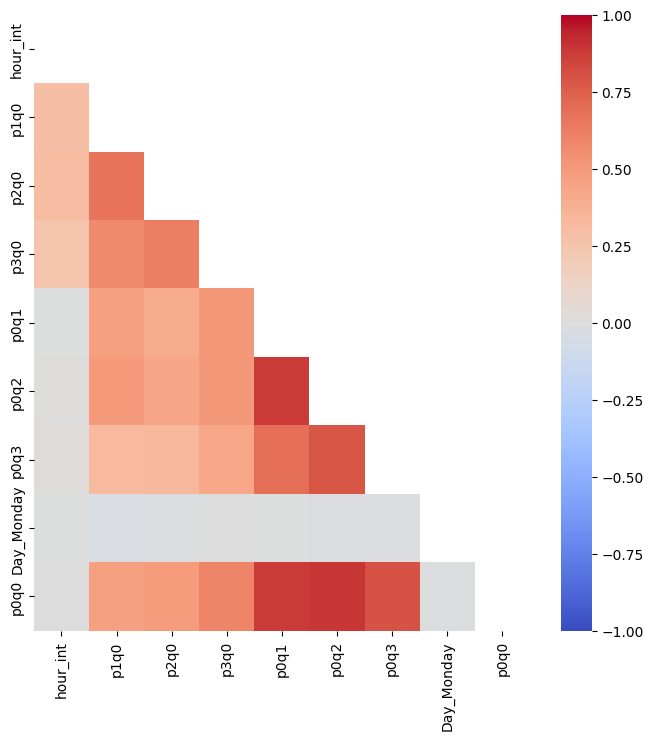

In [38]:
visualization.plot_corr(df[columns_to_plot], width=8, height=8, 
                        print_value=False)


### **II. Construction du modèle**

Il semble que le plus important soient les piqj.
Il faut également éviter la redondance entre pes p0qj

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean


## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression

--2023-05-14 09:49:25--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-05-14 09:49:25 (37.7 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-05-14 09:49:25--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [40]:
#train test split
#We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).

df_train, df_test = train_test_split(df, test_size=0.3, random_state=19)

In [41]:

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  12366 ; Test samples  5300


###### 1. Univariate regression : p0q2

**Goal:** Predict p0q0 based on p0q2 as it is the variable with the most correlation to y



In [42]:
df_train[['p0q0','p0q2']]

,p0q0,p0q2
9298,0.158,0.111
26504,0.468,0.319
14584,0.190,0.137
14191,0.343,0.292
7792,0.145,0.127
...,...,...
11440,0.323,0.211
2531,0.216,0.141
3058,0.261,0.132
30308,0.553,0.621


In [43]:
# Scikit learn models expect matrices. We first transform 
# the dataframe into an array
X_train = df_train[['p0q2'] ].values

# Scikit learn models expect matrices with multiple 
# rows and columns as X. X_train has instead just one column
# ==> The following code is necessary
X_train = X_train.reshape(-1,1)

y_train = df_train['p0q0'].values


# Do the same for the test dataset
X_test = df_test[[ 'p0q2'] ].values.reshape(-1,1)
y_test = df_test['p0q0'].values

In [44]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=['p0q2'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 4.924e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:27   Log-Likelihood:                 16537.
No. Observations:               12366   AIC:                        -3.307e+04
Df Residuals:                   12364   BIC:                        -3.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1067      0.001     89.375      0.0

In [45]:
# predict with new values

interval = np.arange(0, 1.001, 0.001).reshape(-1,1)
h_values = model.predict(interval)
h_values

array([0.10665018, 0.10752236, 0.10839454, ..., 0.97708899, 0.97796118,
       0.97883336])

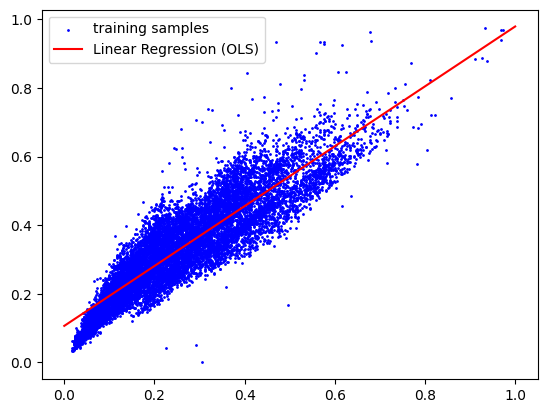

In [46]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(X_train,y_train,color='blue',s=1, 
           label="training samples")

ax.plot(interval,h_values, label="Linear Regression (OLS)", color = 'red')
ax.legend()



In [47]:
# evaluate on the test data

y_pred = model.predict(X_test)
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
0,0.063,0.141538
1,0.374,0.277598
2,0.366,0.387493
3,0.328,0.432847
4,0.330,0.290681
...,...,...
5295,0.326,0.354350
5296,0.130,0.190380
5297,0.755,0.748577
5298,0.607,0.475584


In [48]:
#compute the MAE

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.04934997768838109

Multivariate linear regression

In [49]:
print(df.columns.tolist())

['date', 'train', 'station', 'hour', 'composition', 'p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3', 'p0q0', 'day', 'Day_Friday', 'Day_Monday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Train_1', 'Train_2', 'Train_3', 'Train_4', 'Train_5', 'Train_6', 'Train_7', 'Train_8', 'Train_9', 'Train_10', 'Train_11', 'Train_13', 'Train_14', 'Train_15', 'Train_16', 'Train_17', 'Train_18', 'Train_19', 'Train_20', 'Train_21', 'Train_23', 'Train_24', 'Train_25', 'Train_26', 'Train_27', 'Train_28', 'Train_29', 'Train_30', 'Train_31', 'Train_32', 'Train_33', 'Train_35', 'Train_36', 'Train_37', 'Train_38', 'Train_39', 'Train_40', 'Train_41', 'Train_42', 'Train_43', 'Train_44', 'Train_45', 'Train_46', 'Train_47', 'Train_48', 'Train_49', 'Train_50', 'Train_51', 'Train_52', 'Train_53', 'Train_54', 'Train_55', 'Station_AA', 'Station_AB', 'Station_AC', 'Station_AD', 'Station_AE', 'Station_AG', 'Station_AH', 'Station_AI', 'Station_AJ', 'Station_AK', 'Station_AL', 'Station_AM', 'Station_AO', 'Station_AQ'

In [50]:
cols = [  'p3q0', 'p0q1', 'p0q2', 'p0q3', 'p0q2', 'Train_1', 'Train_2', 'Train_5',  'Train_9', 'Train_10', 'Train_11', 'Train_13', 'Train_14', 'Train_16', 'Train_17', 'Train_18', 'Train_19', 'Train_21', 'Train_23', 'Train_24', 'Train_25', 'Train_26', 'Train_27', 'Train_28', 'Train_29', 'Train_30', 'Train_31', 'Train_33', 'Train_35', 'Train_37', 'Train_38', 'Train_39', 'Train_40', 'Train_41', 'Train_42', 'Train_44', 'Train_46', 'Train_47', 'Train_48', 'Train_50', 'Train_51', 'Train_52', 'Train_53', 'Train_54', 'Train_55','Station_AA', 'Station_AB', 'Station_AC', 'Station_AD', 'Station_AE', 'Station_AH', 'Station_AI', 'Station_AJ', 'Station_AK', 'Station_AL', 'Station_AM', 'Station_AO', 'Station_AT', 'Station_AU', 'Station_AW', 'Station_AZ', 'Station_BB', 'Station_BJ']
# Scikit learn models expect matrices. We first transform 
# the dataframe into an array
X_train_multi = df_train[cols].values

y_train_multi = df_train['p0q0'].values


# Do the same for the test dataset
X_test_multi = df_test[cols]
y_test = df_test['p0q0'].values

In [51]:

Mmodel = AndreaLinearRegression()
Mmodel.fit(X_train_multi, y_train_multi, column_names=cols)
Mmodel.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3411.
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:30   Log-Likelihood:                 24543.
No. Observations:               12366   AIC:                        -4.896e+04
Df Residuals:                   12303   BIC:                        -4.849e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0968      0.002     51.000      0.0

In [52]:
y_pred_multi = Mmodel.predict(X_test_multi)
MAE_multi = mean_absolute_error(y_test, y_pred_multi)
MAE_multi

0.022198870847994972

Cross validation

In [53]:
X = df[cols].values
y = df['p0q0'].values


k_fold = KFold(n_splits=10, shuffle=True, random_state=19)

# Cross validation works with score, i.e., the higher the better.
# This is why the scoring function is the negative Mean Absolute Error.
scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_absolute_error')
scores

array([-0.02217461, -0.0223241 , -0.02200519, -0.02357451, -0.02317248,
       -0.02298506, -0.02296504, -0.02257741, -0.02303254, -0.0229428 ])

In [54]:
mae_vector = -scores
mae_vector

array([0.02217461, 0.0223241 , 0.02200519, 0.02357451, 0.02317248,
       0.02298506, 0.02296504, 0.02257741, 0.02303254, 0.0229428 ])

In [55]:
avg_mae = mean(mae_vector)
avg_mae

0.022775372213980502

In [56]:
X = df['p0q2'].values.reshape(-1,1)



scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_absolute_error')

mae_vector = -scores
avg_mae = mean(mae_vector)
avg_mae

0.0504116947011425